#TMD Drell Yan

##Specify path to TMD libs

In [11]:
#root='/Users/nobuosato/Dropbox/work/python_TMD/'
#root='/home/nsato/Dropbox/work/python_TMD'
root='../../'

##load libraries

In [12]:
import sys,os
sys.path.insert(1,root)
import pylab as py
import numpy as np
%matplotlib inline  
from TMDPDF import TMDPDF
from StrongCoupling import StrongCoupling
from tools import ProgressBar,tex
from DrellYan import DrellYan
from iTMD import InteractiveTMD
from CollinearPDF import Cteq6PDF,FakePDF

In [13]:
ITMD = InteractiveTMD(root)

##initialize collinear PDF 

In [24]:
ITMD.select_CPDFS()

##Setup Kinematics

In [33]:
Q=91.1876
RS=1900.0
y=0 

##initialize Drell Yan instances. We can setup each instace with different parameters etc. Available pdfsets: 'fake' and 'cteq6'

In [34]:
DY1=DrellYan(ITMD.CPDF)
DY2=DrellYan(ITMD.CPDF)

##Setup parameters for DY1

In [35]:
Q0=1.3
b0=0.86*Q0
 
DY1.TMD.D['bT2max']=0.5**2
DY1.TMD.D['Q02']=Q0**2
DY1.TMD.D['C3']=b0
DY1.TMD.D['zetaF0']=4*DY1.TMD.D['Q02']
a1= 0.21
a2= 0.68
a3=-0.6*0.21

DY1.TMD.D['NP model']=lambda x,mu2,bT2: np.exp(-0.5*( a1 + a2*np.log(mu2**0.5/3.2) + a3*np.log(100*x) )*bT2)

##Setup parameters for DY2

In [36]:
Q0=1.3
b0=0.86*Q0

DY2.TMD.D['bT2max']=1.5**2
DY2.TMD.D['Q02']=Q0**2
DY2.TMD.D['C3']=b0
DY2.TMD.D['zetaF0']=4*DY2.TMD.D['Q02']
b1= 0.201
b2= 0.184
b3=-0.026

DY2.TMD.D['NP model']=lambda x,mu2,bT2: np.exp(-0.5*( b1 + b2*np.log(mu2**0.5/3.2) + b3*np.log(100*x) )*bT2)

##define bT values to be computed

In [37]:
BT=np.linspace(1e-3,1.4,100)

##compute bT*W for DY1 and store values in BTW1

In [38]:
bar=ProgressBar(BT.size,'computing')
BTW1=[]
cnt=0
for bT in BT: 
    BTW1.append(bT*DY1.get_L_bT_space(Q,RS,y,bT))
    bar.animate(cnt)
    cnt+=1

[**********************99%*************]  computing  99 of 100 complete


##compute bT*W for DY2 and store values in BTW2

In [39]:
bar=ProgressBar(BT.size,'computing')
BTW2=[]
cnt=0
for bT in BT: 
    BTW2.append(bT*DY2.get_L_bT_space(Q,RS,y,bT))
    bar.animate(cnt)
    cnt+=1

[**********************99%*************]  computing  99 of 100 complete


##make plot

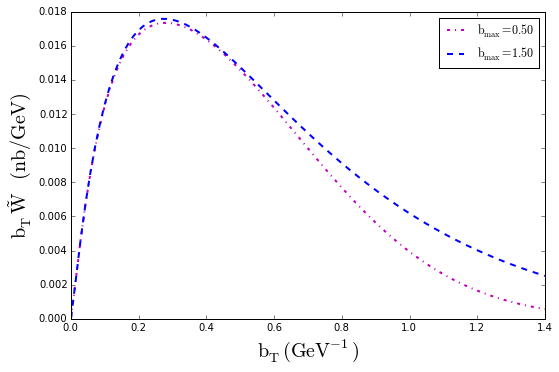

In [40]:
py.figure(figsize=(8.5,5.5))
ax=py.subplot(111)

if 1: ax.plot(BT,BTW1,'m-.',lw=2,label=tex('b_{max}=%0.2f')%(DY1.TMD.D['bT2max']**0.5))
if 1: ax.plot(BT,BTW2,'b--',lw=2,label=tex('b_{max}=%0.2f')%(DY2.TMD.D['bT2max']**0.5))

ax.set_ylabel(tex('b_T\\tilde{W}\;(nb/GeV)'),size=20)
ax.set_xlabel(tex('b_T(GeV^{-1})'),size=20)
ax.legend()